In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### step 1: Load Data

In [3]:
df = pd.read_csv('cleaned_dataset.csv')

### step 2: Feature-Target Relationships

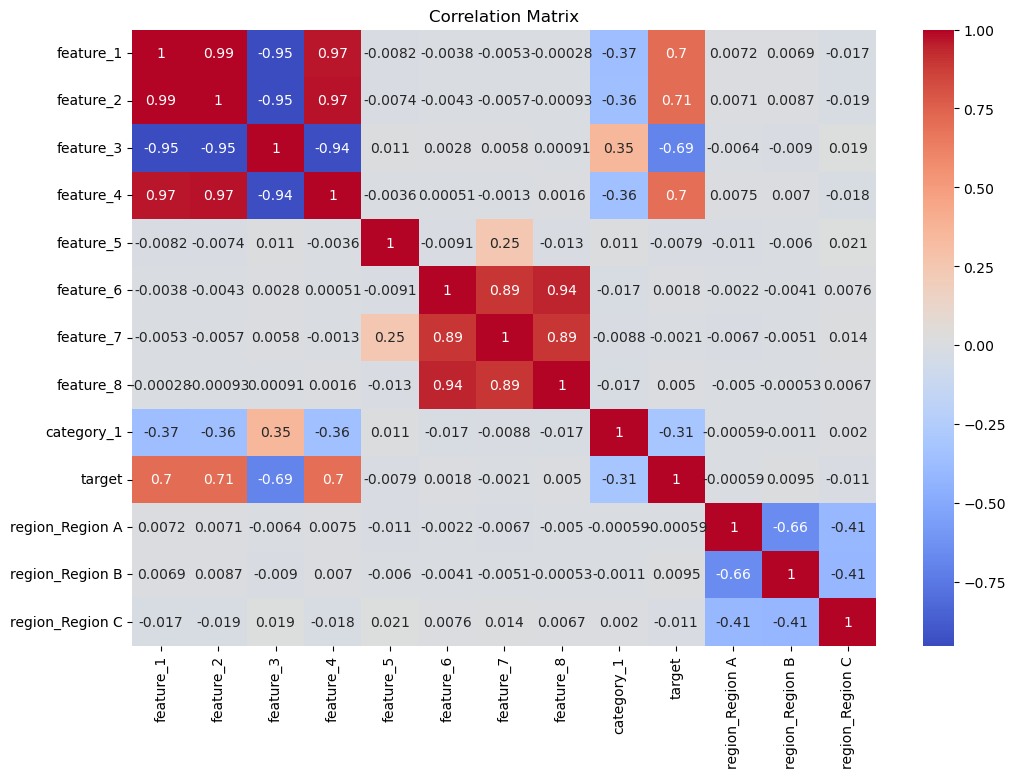

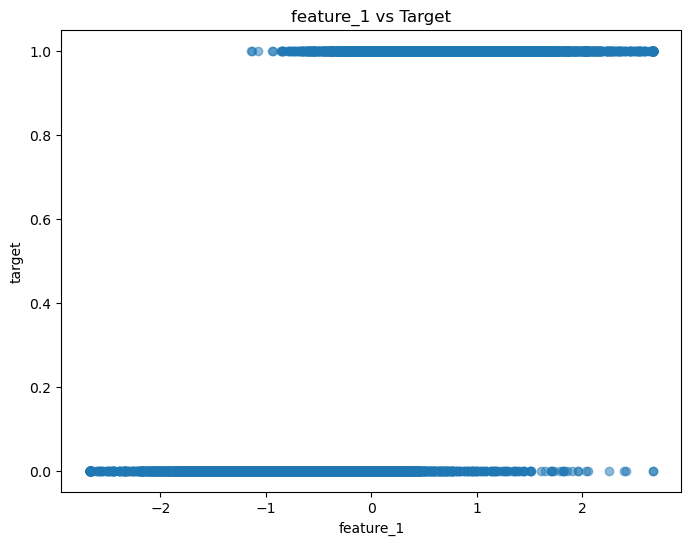

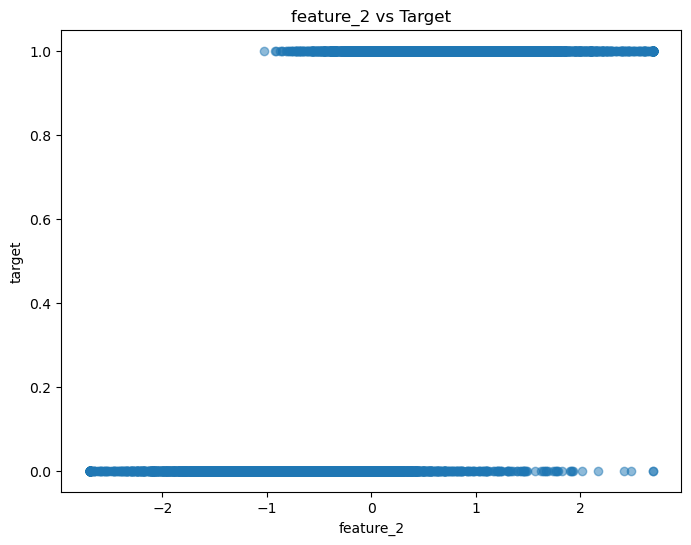

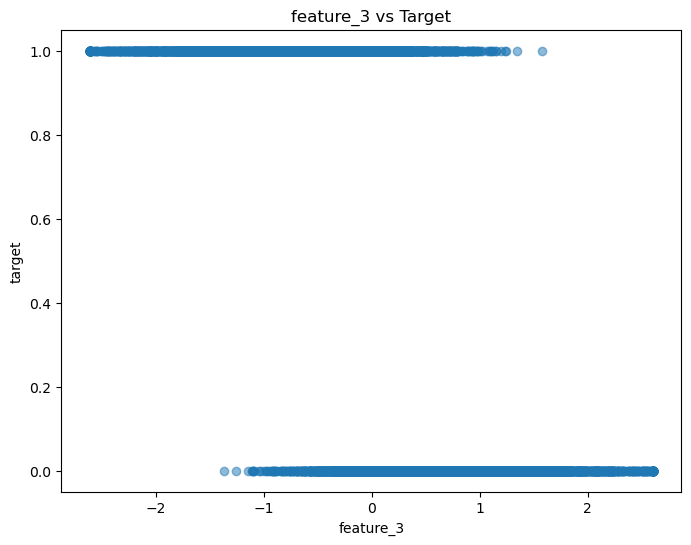

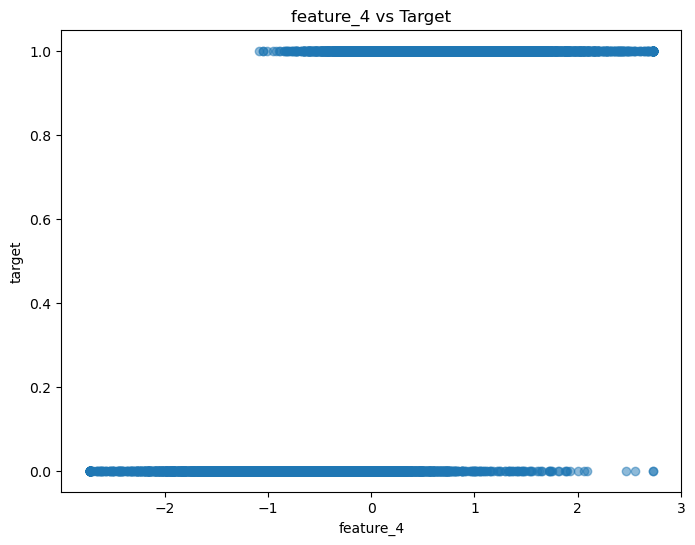

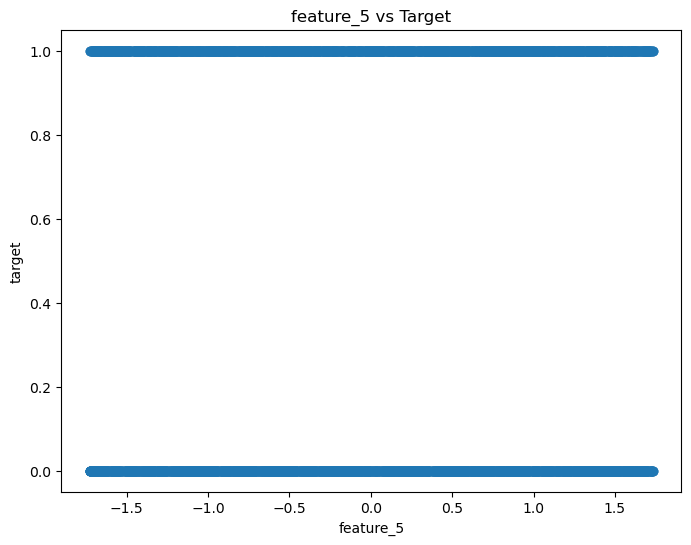

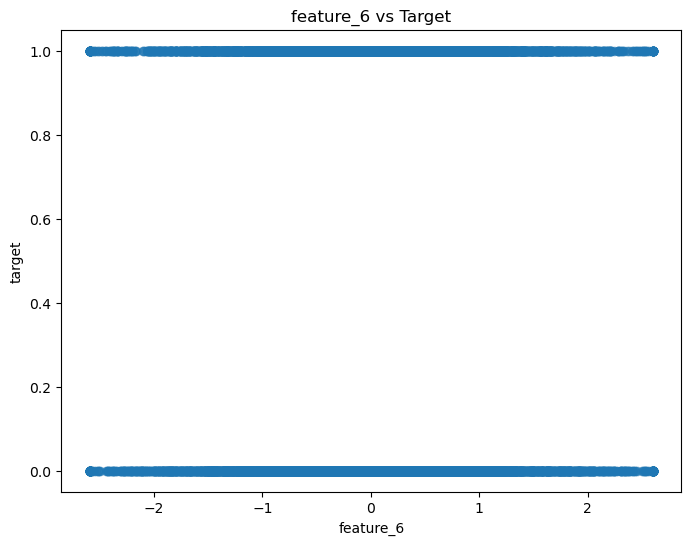

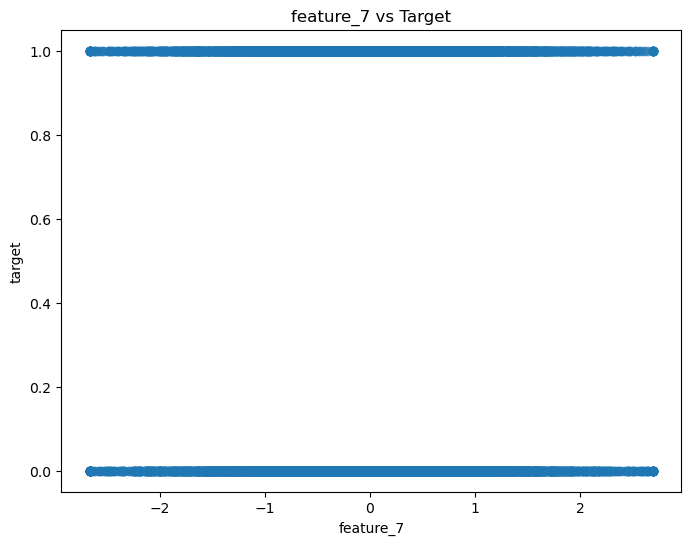

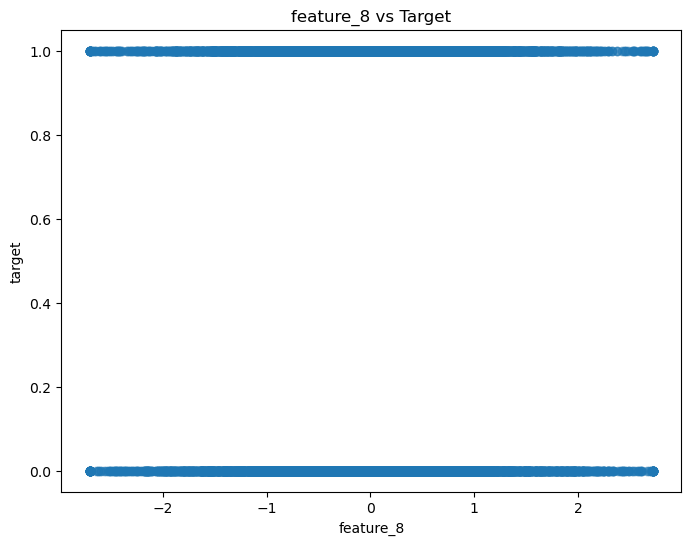

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features = [col for col in df.columns if col.startswith('feature')]
for feature in features:
   plt.figure(figsize=(8, 6))
   plt.scatter(df[feature], df['target'], alpha=0.5)
   plt.xlabel(feature)
   plt.ylabel('target')
   plt.title(f'{feature} vs Target')
   plt.show()

### step 3: Distribution Analysis

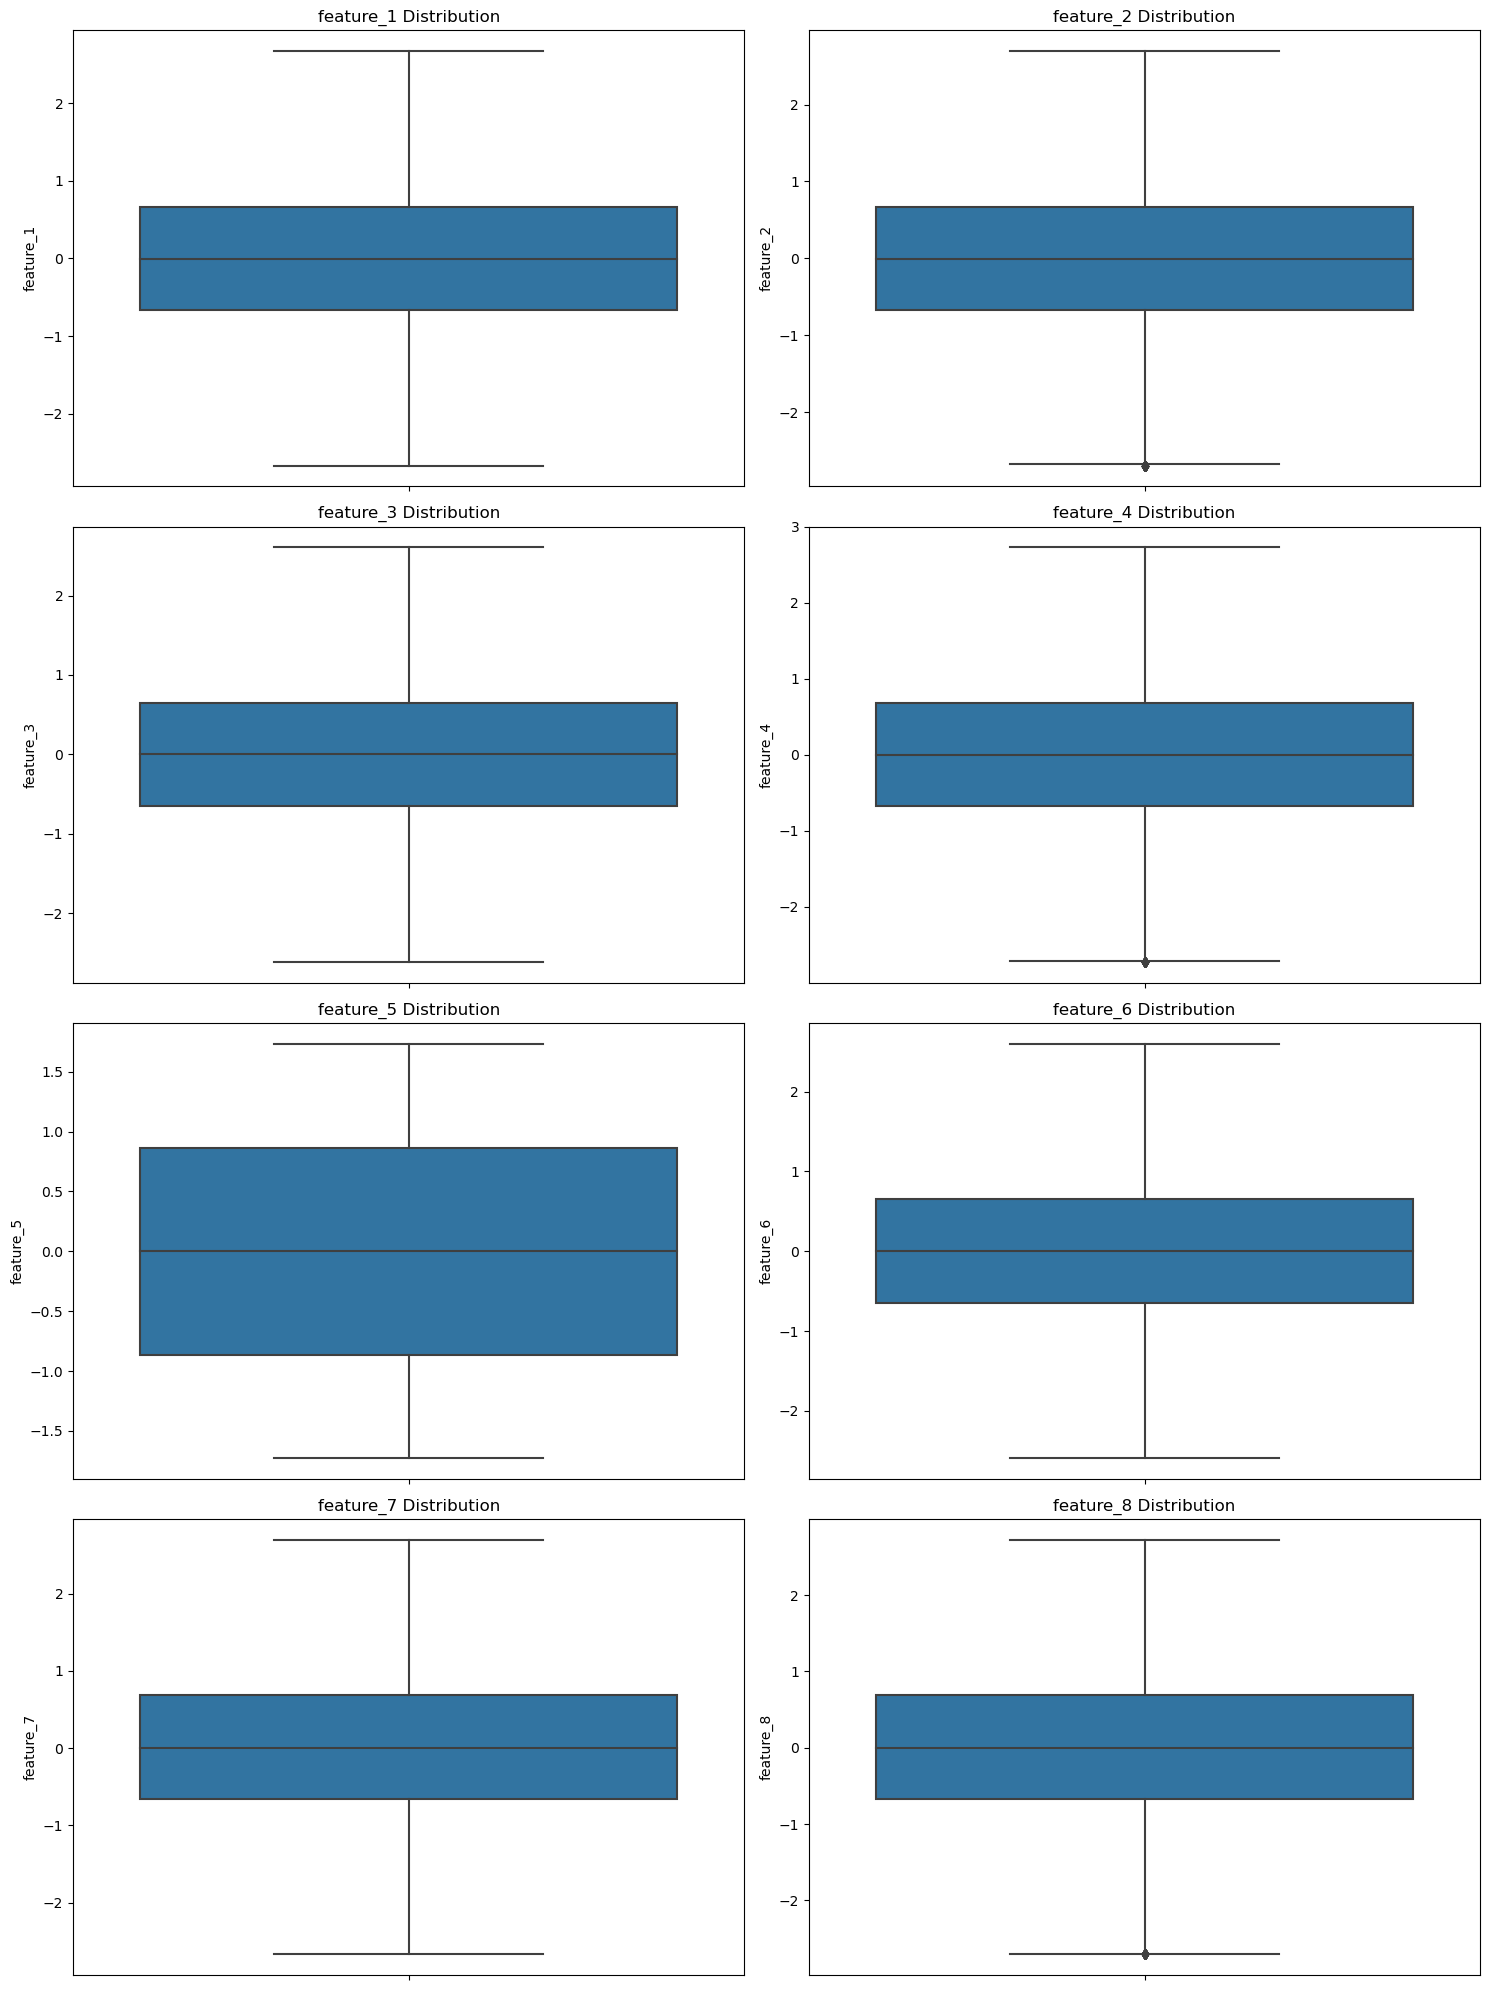

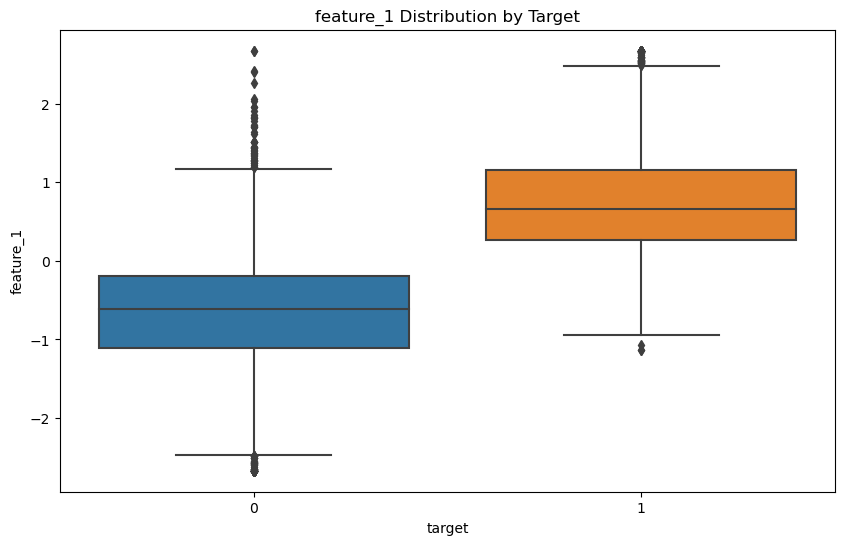

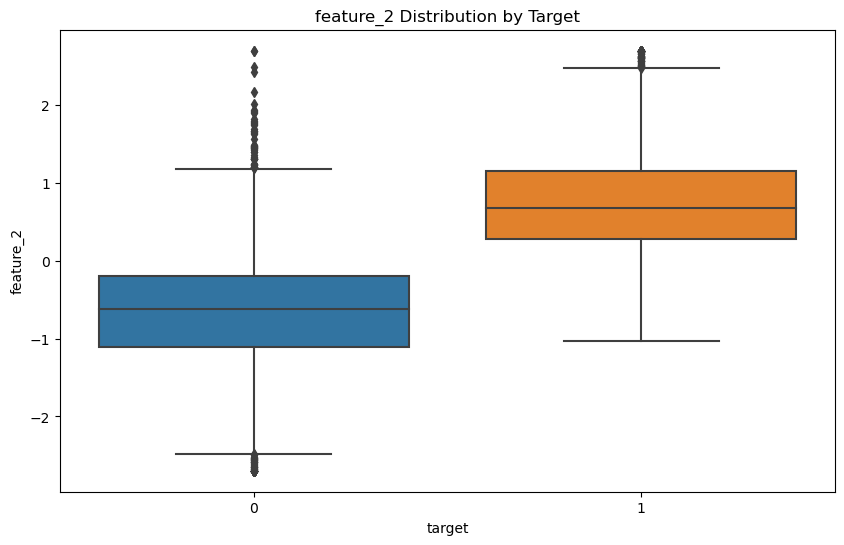

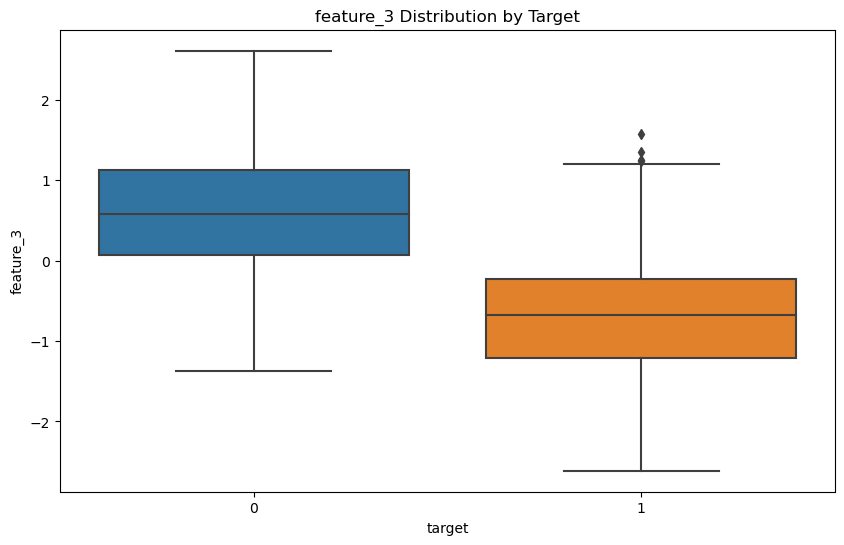

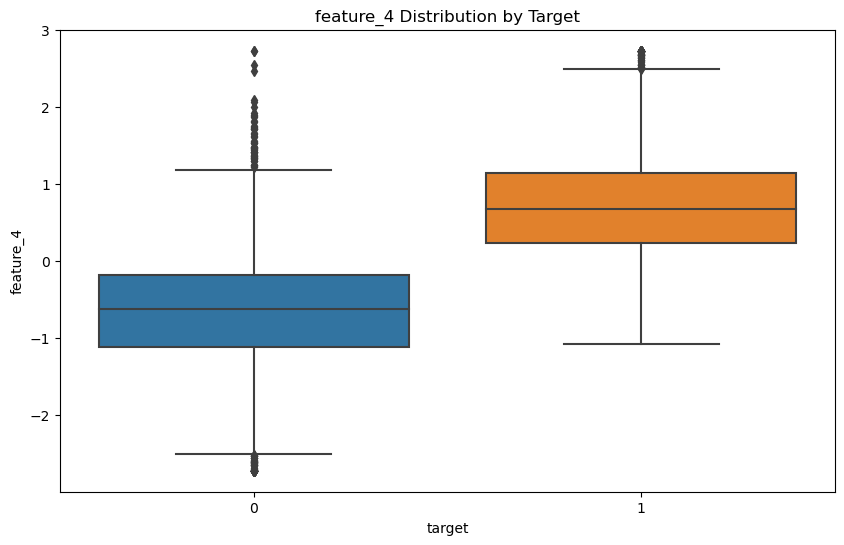

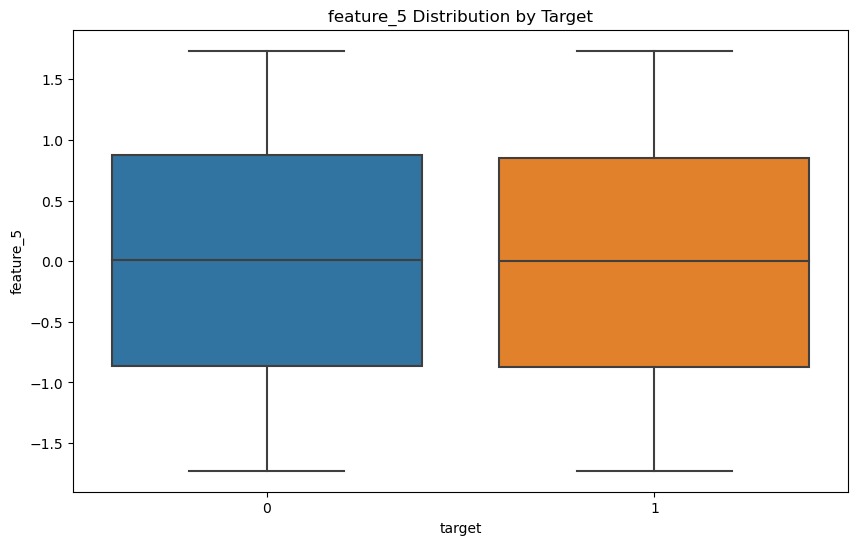

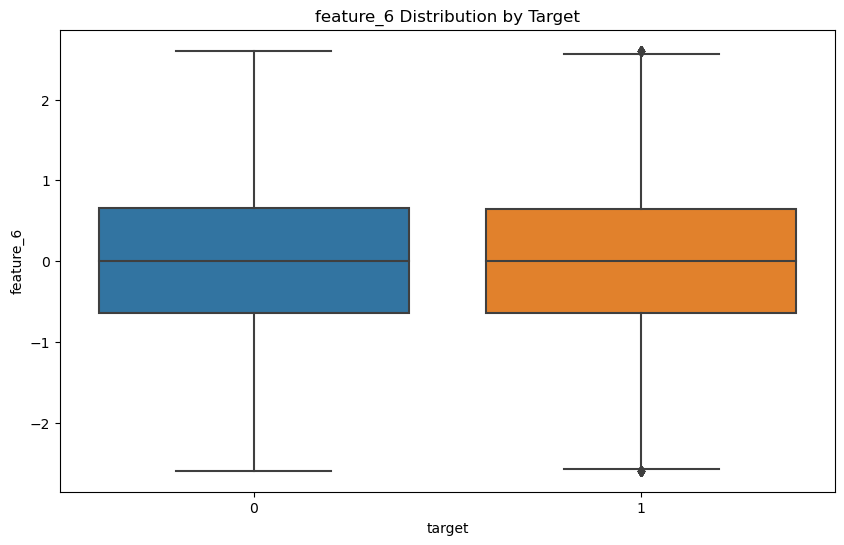

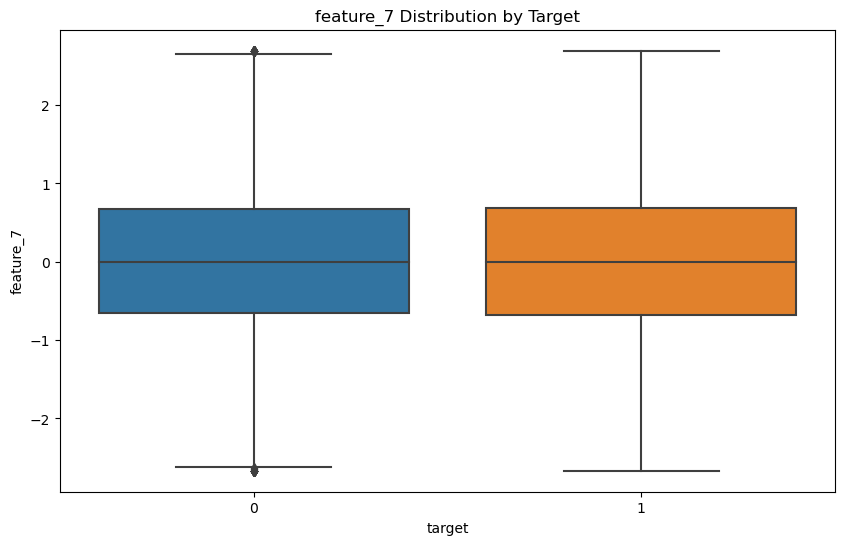

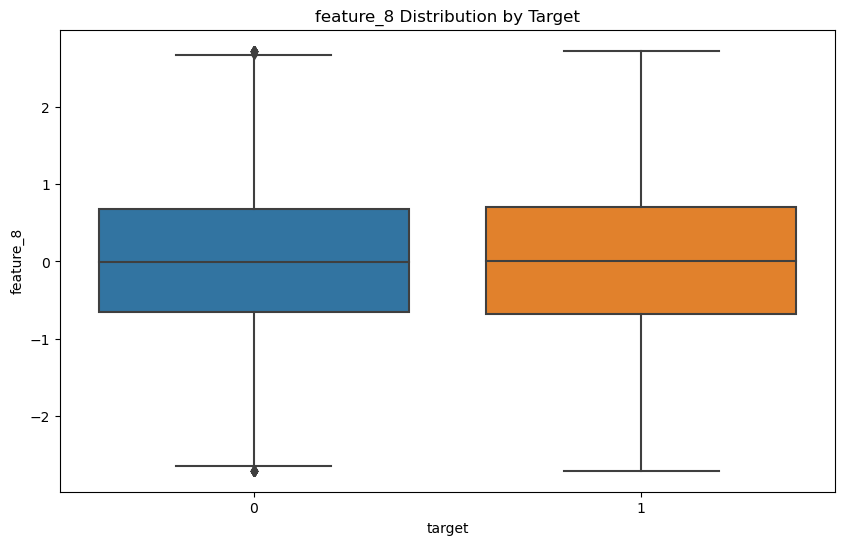

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, col in enumerate(features):
   sns.boxplot(data=df, y=col, ax=axes[i//2, i%2])
   axes[i//2, i%2].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

for feature in features:
   plt.figure(figsize=(10, 6))
   sns.boxplot(data=df, x='target', y=feature)
   plt.title(f'{feature} Distribution by Target')
   plt.show()

### step 4: Regions Analysis

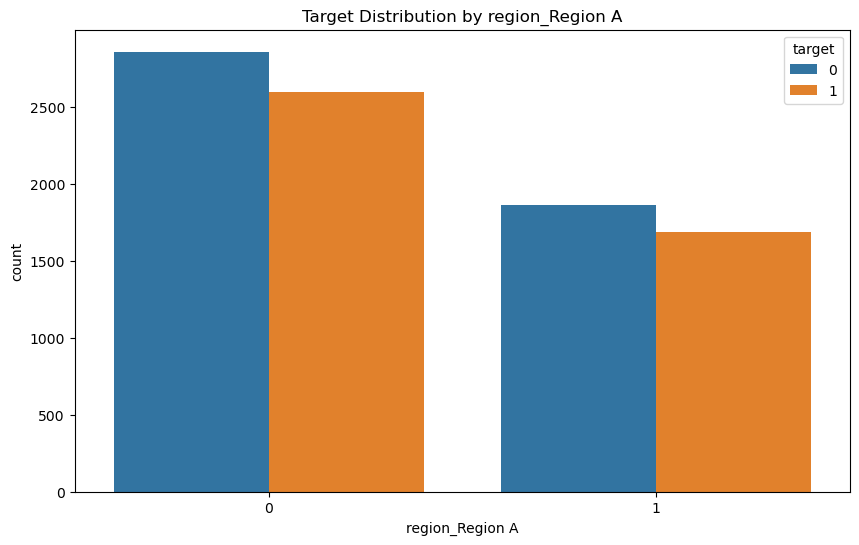

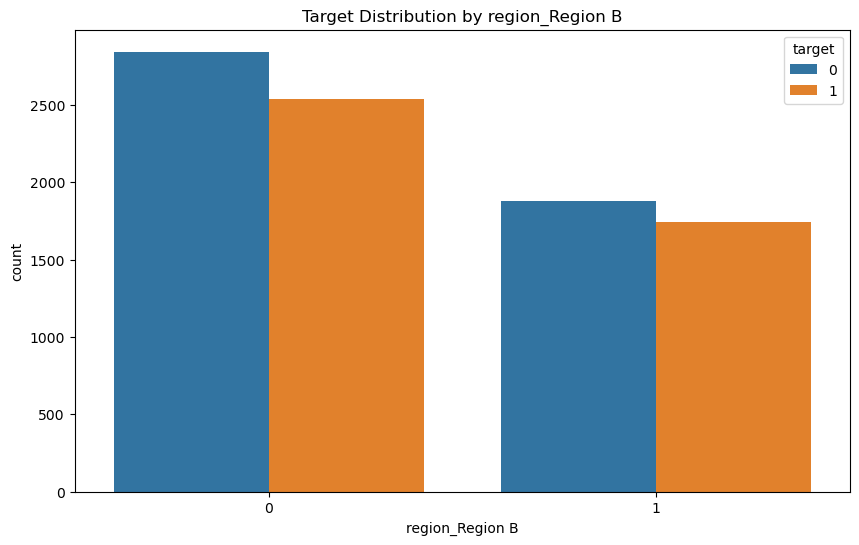

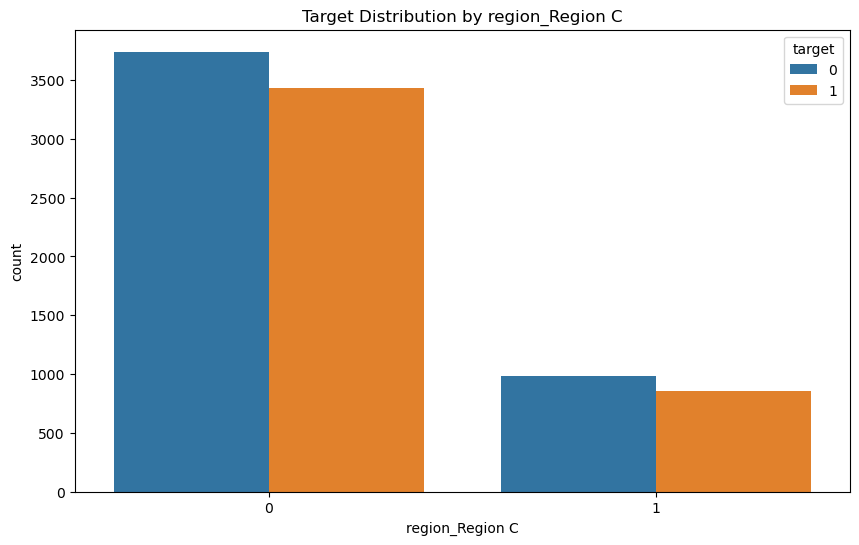

In [6]:
regions = [col for col in df.columns if col.startswith('region')]
for region in regions:
   plt.figure(figsize=(10, 6))
   sns.countplot(data=df, x=region, hue='target')
   plt.title(f'Target Distribution by {region}')
   plt.show()

### step 5: Statistical Tests

In [7]:
print('\nT-test results for numerical features:')
for feature in features:
   t_stat, p_val = stats.ttest_ind(df[df['target']==0][feature], 
                                  df[df['target']==1][feature])
   print(f'{feature}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}')

# Change the chi-square test section:
for region in regions:
    contingency = pd.crosstab(df[region], df['target'])
    test_result = stats.chi2_contingency(contingency)
    chi2, p_value = test_result[0], test_result[1]
    print(f'\nChi-square test results for {region}:')
    print(f'Chi-square statistic: {chi2:.2f}')
    print(f'p-value: {p_value:.4f}')


T-test results for numerical features:
feature_1: t-stat = -94.15, p-value = 0.0000
feature_2: t-stat = -94.96, p-value = 0.0000
feature_3: t-stat = 91.27, p-value = 0.0000
feature_4: t-stat = -92.35, p-value = 0.0000
feature_5: t-stat = 0.75, p-value = 0.4552
feature_6: t-stat = -0.18, p-value = 0.8609
feature_7: t-stat = 0.20, p-value = 0.8423
feature_8: t-stat = -0.47, p-value = 0.6369

Chi-square test results for region_Region A:
Chi-square statistic: 0.00
p-value: 0.9723

Chi-square test results for region_Region B:
Chi-square statistic: 0.77
p-value: 0.3812

Chi-square test results for region_Region C:
Chi-square statistic: 1.00
p-value: 0.3182


### step 6: Summery Statistics


Numerical Features Summary:
          feature_1     feature_2     feature_3     feature_4     feature_5  \
count  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03   
mean   2.329001e-17 -5.526444e-18  7.105427e-18  1.776357e-17  2.289527e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -2.670385e+00 -2.697168e+00 -2.613244e+00 -2.726477e+00 -1.727818e+00   
25%   -6.667518e-01 -6.747574e-01 -6.553462e-01 -6.796623e-01 -8.667329e-01   
50%   -2.961869e-03 -8.188071e-03 -2.932976e-04 -5.523090e-03  6.705788e-03   
75%    6.690037e-01  6.735166e-01  6.499193e-01  6.848809e-01  8.645580e-01   
max    2.672637e+00  2.695928e+00  2.607817e+00  2.731696e+00  1.735573e+00   

          feature_6     feature_7     feature_8  
count  9.000000e+03  9.000000e+03  9.000000e+03  
mean   1.440823e-17  9.079157e-18  1.855306e-17  
std    1.000056e+00  1.000056e+00  1.000056e+00  
min   -2.593987e+00 -2.668219e+00 -2.706858e+00  
25%   -6.

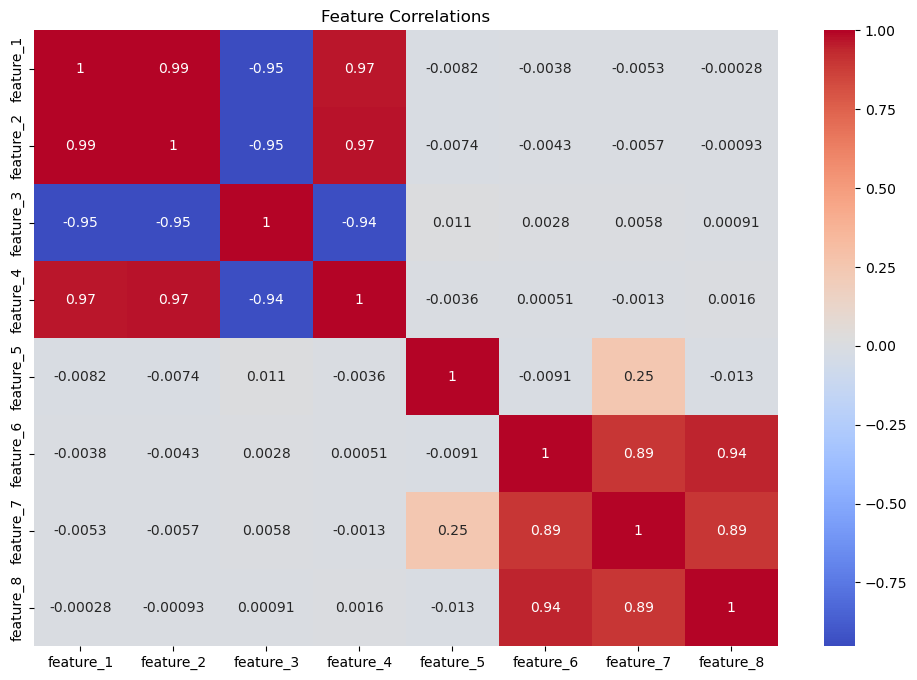

In [8]:
print('\nNumerical Features Summary:')
print(df[features].describe())

# 6. Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()